# ML Classifer Applications on Word2Vec Data

In [2]:
import numpy as np
import sklearn
import time
import pandas as pd
import random


In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron 
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import os
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics

In [4]:
def readTrainTestData(trainFile, testFile):
    '''
    Input: trainFile - name of training data file (str)
            testFile - name of test data file (str)
            
    Returns: train_vec - training data variables (list of arrays)
            train_lab - training data labels (list)
            test_vec - test data variables (list of arrays)
            test_lab - test data labels (list)
    '''
    
    train_lab = list()
    train_vec = []
    test_lab = list()
    test_vec = []

    train_data = np.genfromtxt(trainFile)
    test_data = np.genfromtxt(testFile)
    
    for ln in range(len(train_data)):
        vals = train_data[ln]
        label = vals[0]
        train_lab.append(label)
    
        rest = vals[1:]
        train_vec.append(rest)
        
    for ln2 in range(len(test_data)):
        test_vals = test_data[ln2]
        test_label = test_vals[0]
        test_lab.append(test_label)
        
        test_rest = test_vals[1:]
        test_vec.append(test_rest)
        
    
    return train_vec, train_lab, test_vec, test_lab

In [5]:
train_vec, train_lab, test_vec, test_lab = readTrainTestData('train_data.txt', 'test_data.txt')

print('Length of training vector:', len(train_vec))
print('Shape of training vector:',train_vec[0].shape)
print('Length of test vector:', len(test_vec))
print('Shape of test vector:', test_vec[0].shape)

Length of training vector: 40000
Shape of training vector: (100,)
Length of test vector: 10000
Shape of test vector: (100,)


## KNN classification 

In [28]:
#KNN with set training and test data 
def sentimentClassKNN(train_vec, train_lab, test_vec, test_lab, k, distanceMeasure):
    # Create a KNN model
    # Fit the training set into the model
    # Calculate and return the prediction accuracy on test set
    
    KNN = KNeighborsClassifier(k, metric = distanceMeasure)
    KNN.fit(train_vec, train_lab)
    y_pred = KNN.predict(test_vec)
    score = metrics.accuracy_score(test_lab, y_pred)
    
    return score 

knn_accu = sentimentClassKNN(train_vec, train_lab, test_vec, test_lab, 4, "euclidean")
print('KNN model accuracy ', knn_accu)

KNN model accuracy  0.7336


In [0]:
### Report: Different k & distance measure #####
knn_vec1 = []
k_range = range(1,7)
for k in k_range:
    start = time.time()
    knn_result1 = sentimentClassKNN(train_vec, train_lab, test_vec, test_lab, k, "euclidean")
    knn_vec1.append(knn_result1)
    print('k-value:', k, ' KNN accuracy', knn_result1)
    end = time.time()
    
    print('Time', end - start)

k-value: 1  KNN accuracy 0.6859
Time 93.9339029788971
k-value: 2  KNN accuracy 0.6892
Time 94.59610939025879
k-value: 3  KNN accuracy 0.7205
Time 94.67766547203064
k-value: 4  KNN accuracy 0.7336
Time 94.8067684173584
k-value: 5  KNN accuracy 0.7455
Time 94.60710597038269
k-value: 6  KNN accuracy 0.7554
Time 94.57918763160706


In [9]:
## SAVED KNN VECTOR 1 
#np.save('knn_vec1file', knn_vec1copy)
savedknn_vec1 = np.load('knn_vec1file.npy')
print(savedknn_vec1)

[0.6859 0.6892 0.7205 0.7336 0.7455 0.7554]


In [0]:
knn_vec2 = []
for k in range(7,15):
    start = time.time()
    knn_result1 = sentimentClassKNN(train_vec, train_lab, test_vec, test_lab, k, "euclidean")
    knn_vec2.append(knn_result1)
    print('k-value:', k, ' KNN accuracy', knn_result1)
    end = time.time()
    
    print('Time', end - start)

k-value: 7  KNN accuracy 0.756
Time 98.62177062034607
k-value: 8  KNN accuracy 0.7688
Time 104.5870430469513
k-value: 9  KNN accuracy 0.7649
Time 102.63957786560059
k-value: 10  KNN accuracy 0.7728
Time 114.38356399536133
k-value: 11  KNN accuracy 0.7726
Time 107.67705488204956
k-value: 12  KNN accuracy 0.7815
Time 110.99570941925049
k-value: 13  KNN accuracy 0.7781
Time 109.79430675506592
k-value: 14  KNN accuracy 0.7857
Time 110.33109831809998


In [10]:
## SAVED KNN VECTOR 2
#np.save('knn_vec2file', knn_vec2copy)
savedknn_vec2 = np.load('knn_vec2file.npy')
print(savedknn_vec2)

[0.756  0.7688 0.7649 0.7728 0.7726 0.7815 0.7781 0.7857]


Text(0, 0.5, 'accuracy values')

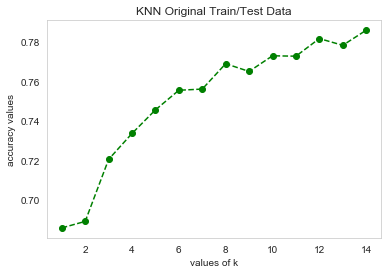

In [0]:
knn_vec_tol = np.concatenate((savedknn_vec1, savedknn_vec2))
k_vals = range(1,15)
plt.plot(k_vals, knn_vec_tol, 'go--')
plt.title('KNN Original Train/Test Data')
plt.xlabel('values of k')
plt.ylabel('accuracy values')

In [7]:
def draw_heatmap_linear(acc, acc_desc, C_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=C_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$C$')
    plt.title(acc_desc + ' w.r.t $C$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

In [20]:
# Combination of training and test data 
X_val = np.concatenate((train_vec, test_vec), axis=0)
y_val = np.concatenate((train_lab, test_lab), axis = 0)

In [0]:
# KNN cross-validation function

def cvKNN(x, y, k_values, k_vector):
    #Cross-validate entire dataset 
    for k in k_values:
        knn_cv = KNeighborsClassifier(n_neighbors = k)
        scores = cross_val_score(knn_cv, x, y, cv = 5, scoring = 'accuracy')
        k_vector.append(scores.mean())
    return k_vector

In [0]:
#cvKNN 
k_accu = []
k_vals = range(1,7)
k_scores = cvKNN(X_val, y_val, k_vals, k_accu)

In [0]:
k_scores

[0.6834, 0.6888599999999999, 0.7236199999999999, 0.73268, 0.7455, 0.7561]

In [11]:
##SAVED CV KNN PRED ACCURACIES
#np.save('k_scorefile', k_scorevals)
savedk_scores = np.load('k_scorefile.npy')
print(savedk_scores)

[0.6834  0.68886 0.72362 0.73268 0.7455  0.7561 ]


[0.6834  0.68886 0.72362 0.73268 0.7455  0.7561 ]


Text(0, 0.5, 'accuracies: cross-validation')

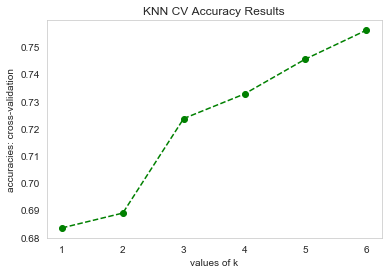

In [0]:
print(savedk_scores)
k_vals = range(1,7)
plt.plot(k_vals, savedk_scores, 'go--')
plt.title('KNN CV Accuracy Results')
plt.xlabel('values of k')
plt.ylabel('accuracies: cross-validation')


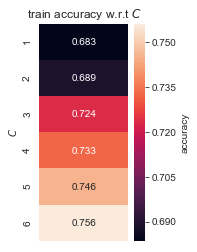

In [0]:
#Heat maps of accuracies 
k_score_arr = np.asarray(savedk_scores)
train_results = k_score_arr.reshape(6,1)
accu_plot = train_results
c_list = np.arange(1,7)
draw_heatmap_linear(accu_plot, 'train accuracy', c_list)

In [7]:
#PCA applied to cross-validated accuracies 
k_accu_pca = []
k_range= range(1,7)
pca = PCA()
train_transform = pca.fit_transform(X_val)
pca_knn = cvKNN(train_transform, y_val, k_range, k_accu_pca)
print(pca_knn)

[0.6834, 0.6888799999999999, 0.7236199999999999, 0.73268, 0.74552, 0.75612]


In [6]:
##SAVED CV & PCA ACCURACIES FOR K VALUES  
#np.save('k_score_pcafile', pca_knn_copy)
savedpca_knn = np.load('k_score_pcafile.npy')
print(savedpca_knn)

[0.6834  0.68888 0.72362 0.73268 0.74552 0.75612]


PCA HAD NO CHANGE ON DATA ACCURACY RESULTS


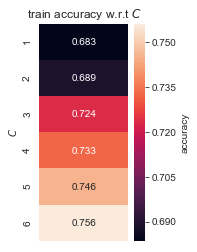

In [15]:
#Heat maps of accuracies 
print('PCA HAD NO CHANGE ON DATA ACCURACY RESULTS')
train_results = savedpca_knn.reshape(6,1)
accu_plot = train_results
c_list = np.arange(1,7)
draw_heatmap_linear(accu_plot, 'train accuracy', c_list)

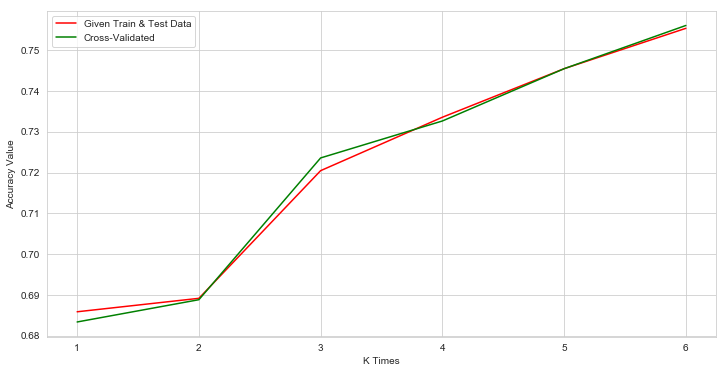

In [14]:
x_side = np.arange(1,7)
savedknn_vec1_arr = savedknn_vec1.reshape(6,1)
savedknn_cv = savedk_scores.reshape(6,1)
# nonreg_pca = ppn_pca_arr.reshape(14,1)


plt.figure(figsize=(12,6))
plt.grid()
plt.plot(x_side, savedknn_vec1_arr,'r', label = 'Given Train & Test Data')
plt.plot(x_side, savedknn_cv, 'g', label = 'Cross-Validated')
plt.ylabel('Accuracy Value')
plt.xlabel('K Times')
plt.legend()
plt.show()

## Perceptron Classifier

In [21]:
#Perceptron 
def sentimentClassPerceptron(train_vec, train_lab, test_vec, test_lab, n):
    # Create a Perceptron model
    # Fit the training set into the model
    # Calculate and return the prediction accuracy on test set
    # YOUR CODE HERE
    
    PCT = Perceptron(max_iter = n, tol=1e-3, eta0 = 0.01, random_state = 0)
    PCT.fit(train_vec, train_lab)
    y_pred = PCT.predict(test_vec)
    score = metrics.accuracy_score(test_lab, y_pred)
    
    return score
    


In [22]:
pct_accu = sentimentClassPerceptron(train_vec, train_lab, test_vec, test_lab, 400000)
print('Perceptron Model Accuracy ', pct_accu)

Perceptron Model Accuracy  0.8059


In [0]:
#Computes accuracy score based on predicted and actual label values
def accuracy_eval(results, real):
    pred = np.array(results)
    lab = np.array(real)
    return float((pred == lab).sum()) / lab.size

class Perceptron_alg: 
    
    def _init_(self):
        pass
    
    def train(self, X, Y, epochs):
        self.learning_rate = 0.01
        #Creates vector with 100 different weights 
        self.weights = [random.uniform(-1.0,1.0) for i in range(len(X[0]))]
        bias = 0.1
        self.weights.append(bias)
        self.mse_vec = []
        
        #Iterations over entire dataset based on epochs
        for _ in range(epochs):
            for i in range(len(X)):
                #Predicts label of each vector
                predictedValue = self.training_classifier(X[i])
                diff = Y[i] - predictedValue
                z = diff
                #Case real and pred value do not match
                if diff != 0:
                    if Y[i] == 0:
                        z = -0.01
                    else:
                        z = 0.01
                        
                squared_diff = (diff)**2
                self.mse_vec.append(np.sum(squared_diff))
                
                    
                
                #Weights will update depending if pred and real did not match
                for j in range(len(X[i])):
                    self.weights[j] = round((self.weights[j] + self.learning_rate* z* X[i][j]),5)
                    
    # @Return the label (0 or 1) of each vector in training data
    def training_classifier(self, X):
        summation = 0
        for i in range(len(X)):
            
            summation += (X[i]*self.weights[i])
        #Based on sum of weights and vec values determines label
        activation = (self.output_val(summation))
        return activation
    
    # @Return label (0 or 1) using the sigmoid function 
    def predict(self, X):
        activation = [] 
        #iterates through each vector
        for i in range(len(X)):
            summation = 0
            for j in range(len(X[i])):
                #sums of multiplied updated weights and vector val
                summation += (X[i][j]*self.weights[j])
            #label vector based on sigmoid function
            activation.append(round(self.sigmoid(summation)))
    
        return activation
    
    
    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))
    
    def output_val(self, x):
        if x>0:
            return 1
        else: 
            return 0
    # MSE  
    def mse_func(self, y):
        mse_results = []
        y_length = len(y)
        for i in range(len(self.mse_vec)):
            prod = (self.mse_vec[i]) / y_length
            mse_results.append(prod)
        return mse_results

In [0]:
ppn_model = Perceptron_alg()

In [0]:

ep_list = range(1,15)
ppn_accuracy = []
for i in ep_list:
    train_it = ppn_model.train(train_vec, train_lab, i)
    prediction = ppn_model.predict(test_vec)
    acc = accuracy_eval(prediction, test_lab)
    ppn_accuracy.append(acc)
  

In [0]:
ppn_accuracy

[0.5253,
 0.5814,
 0.6372,
 0.6793,
 0.6729,
 0.7349,
 0.7287,
 0.7361,
 0.744,
 0.7443,
 0.7316,
 0.7394,
 0.7126,
 0.7273]

In [23]:
## Saved predicted ppn accuracies after modeled trained 

# np.save('ppn_accu_file', ppn_accuracy_copy)
savedppn_accuracy = np.load('ppn_accu_file.npy')
print(savedppn_accuracy)

[0.5253 0.5814 0.6372 0.6793 0.6729 0.7349 0.7287 0.7361 0.744  0.7443
 0.7316 0.7394 0.7126 0.7273]


In [0]:
def draw_heatmap_linear2(acc, acc_desc, C_list):
    plt.figure(figsize = (3,5))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=C_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$epoch$')
    plt.title(acc_desc + ' w.r.t $epoch$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

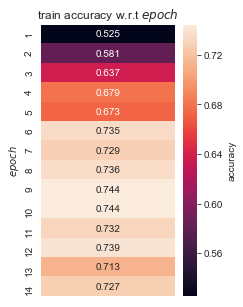

In [0]:
#Heat maps of accuracies 
ppn_array = np.asarray(savedppn_accuracy)
train_results = ppn_array.reshape(14,1)
accu_plot = train_results
c_list = np.arange(1,15)
draw_heatmap_linear2(accu_plot, 'train accuracy', c_list)


In [0]:

# Mean Squared Error
mse_vals = ppn_model.mse_func(train_lab)
ep = 40000
previous = 0
mse_dec = []
while ep <= len(mse_vals): 
    epoch_num = sum(mse_vals[previous:ep-1])
    mse_dec.append(epoch_num)
    previous = ep
    ep += 40000

print(mse_dec)

[0.264324999999975, 0.2450249999999771, 0.20269999999998176, 0.17522499999998478, 0.1559749999999869, 0.14274999999998836, 0.13224999999998951, 0.12384999999999044, 0.11649999999999125, 0.11022499999999194, 0.10464999999999255, 0.09904999999999317, 0.09402499999999372, 0.08917499999999426]


In [24]:
## SAVED PPN REG. MSE VALUES PER EPOCH [1,15]
#np.save('ppn_msefile', mse_ppncopy)

savedppn_mse = np.load('ppn_msefile.npy')
print(savedppn_mse)

[0.264325 0.245025 0.2027   0.175225 0.155975 0.14275  0.13225  0.12385
 0.1165   0.110225 0.10465  0.09905  0.094025 0.089175]


Text(0, 0.5, 'Mean Square Error')

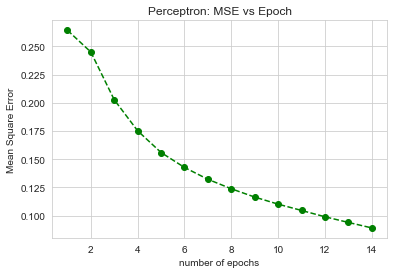

In [0]:
ep_list = range(1,15)
plt.grid()
plt.plot(ep_list, savedppn_mse, 'go--')
plt.title('Perceptron: MSE vs Epoch')
plt.xlabel('number of epochs')
plt.ylabel('Mean Square Error')

In [0]:
#Cross validation Perceptron 
#Run until find best epoch - or even best epoch range 
ppn_cv_accuracy = []
slct_epoch = [8, 9, 10, 11]
for n in slct_epoch:
    for t in range(3):
        X_train, X_test, y_train, y_test = train_test_split(X_val, y_val, test_size = 0.25)

        train_it = ppn_model.train(X_train, y_train, n)
        prediction = ppn_model.predict(X_test)
        acc = accuracy_eval(prediction, y_test)
        ppn_cv_accuracy.append(acc)



In [0]:
previous = 0
i = 3
avg_epochs = []
while i <= len(ppn_cv_accuracy):
    ep_num = ppn_cv_accuracy[previous:i-1]
    ep_avg = np.mean(ep_num)
    avg_epochs.append(ep_avg)
    previous = i
    i += 3
print('Average CV Accuracy for Epochs {8,9,10,11} --', avg_epochs)


In [25]:
# SAVED SELECTED EPOCHS CV APPLIED 
##np.save('ppncv_epochs', avg_epochscopy)
savedavg_epochs = np.load('ppncv_epochs.npy')
print(savedavg_epochs)

[0.84608 0.85192 0.85308 0.85892]


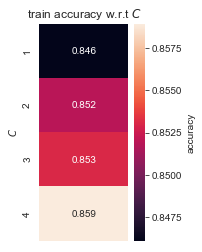

In [0]:
ppn_acc = np.asarray(savedavg_epochs)
train_results = ppn_acc.reshape(4,1)
accu_plot = train_results
c_list = np.arange(1,5)
draw_heatmap_linear(accu_plot, 'train accuracy', c_list)


In [0]:
###### Report: PCA + Perceptron different epoch iteration #########
###Potential add standard scaler as later comparison (not here)

pca = PCA()
train_transform = pca.fit_transform(train_vec)
ppn_pca_accuracy = []
for i in ep_list:
 
    pca_ppn = ppn_model.train(train_transform, train_lab, i)
    prediction = ppn_model.predict(test_vec)
    acc = accuracy_eval(prediction, test_lab)
    ppn_pca_accuracy.append(acc)

In [0]:
ppn_pca_accuracy

[0.4398,
 0.4919,
 0.4218,
 0.4173,
 0.5054,
 0.4563,
 0.4875,
 0.5223,
 0.5171,
 0.4995,
 0.4985,
 0.5118,
 0.5032,
 0.4915]

In [26]:
## SAVED PPN PRED. ACCURACIES W/ PCA APPLIED
#np.save('ppn_pca_accuracy_file', ppn_pca_accuracy_copy)

savedppn_pca_accu = np.load('ppn_pca_accuracy_file.npy')
print(savedppn_pca_accu)

[0.4398 0.4919 0.4218 0.4173 0.5054 0.4563 0.4875 0.5223 0.5171 0.4995
 0.4985 0.5118 0.5032 0.4915]


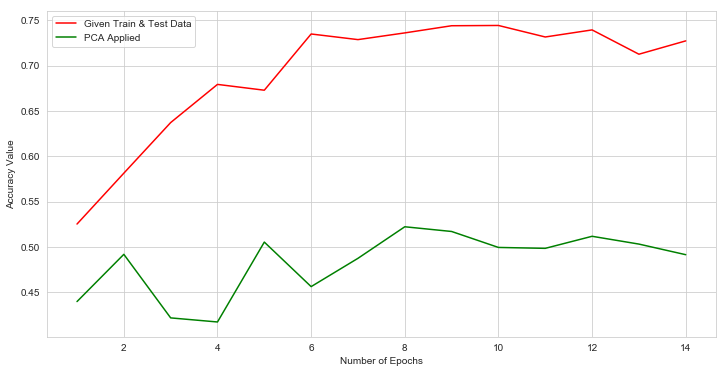

In [0]:
#Plot Perceptron: Non and PCA applied 
x_side = np.arange(1,15)
reg_ppn = ppn_array.reshape(14,1)
ppn_pca_arr = np.asarray(savedppn_pca_accu)
nonreg_pca = ppn_pca_arr.reshape(14,1)


plt.figure(figsize=(12,6))
plt.grid()
plt.plot(x_side, reg_ppn,'r', label = 'Given Train & Test Data')
plt.plot(x_side, nonreg_pca, 'g', label = 'PCA Applied')
#plt.plot(n_listcv, pca_pct,'b', label = 'PCA + Cross-Validated')
plt.ylabel('Accuracy Value')
plt.xlabel('Number of Epochs')
plt.legend()
plt.show()

## SVM Classifier

In [0]:
# SVM for set data 
SVC_class = SVC(kernel = 'linear')
SVC_class.fit(train_vec, train_lab)
y_predSVC = SVC_class.predict(test_vec)
svm_accuracy = metrics.accuracy_score(test_lab, y_predSVC)
print('SVM Accuracy:', svm_accuracy)

SVM Accuracy: 0.8688


In [16]:
## SAVED SVM ACCURACY FOR GIVEN DATA
#np.save('svm_accufile', svm_accu)
savedsvm_accu = np.load('svm_accufile.npy')
print(savedsvm_accu)

0.8688


In [0]:
#SVM: Cross-Validate data
svc_class = SVC(kernel = 'linear')
svc_scores = cross_val_score(svc_class, X_val, y_val, cv=5, scoring = 'accuracy')
svmcv_accu = svc_scores.mean()
print('Cross-Validated SVM Accuracy:', svmcv_accu)

Cross-Validated SVM Accuracy: 0.8624


In [17]:
## SAVED CV SVM ACCURACY VALUE
#np.save('cv_svm_accufile', cv_svm_accu)
savedcv_svm_accu = np.load('cv_svm_accufile.npy')
print(savedcv_svm_accu)

0.8624


## Logistic Regression Classifier

In [19]:
# Logistic Regression for set data 
logRegression = LogisticRegression(solver = 'lbfgs')
logRegression.fit(train_vec, train_lab)
ypred_log = logRegression.predict(test_vec)
lr_accuracy = metrics.accuracy_score(test_lab, ypred_log)
print('Logistic Regression Accuracy:', lr_accuracy)

print(classification_report(test_lab, ypred_log))

Logistic Regression Accuracy: 0.8675
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87      5000
         1.0       0.87      0.86      0.87      5000

   micro avg       0.87      0.87      0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [0]:
# Logistic Regression + Cross-validation 
logRegression = LogisticRegression(solver = 'lbfgs')
lr_scores = cross_val_score(logRegression, X_val, y_val, cv=5, scoring = 'accuracy')
lrcv_accu = lr_scores.mean()
print('Cross-Validated LR Accuracy:', lrcv_accu)

Cross-Validated LR Accuracy: 0.86176


In [18]:
## SAVED CV LR ACCURACY 
#np.save('lrcv_accufile', lrcv_accucopy)
savedlrcv_accu = np.load('lrcv_accufile.npy')
print(savedlrcv_accu)

0.86176


## Visual Summary for Accuracy Results

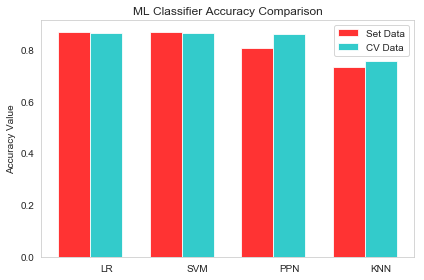

In [29]:
#knn - highest accuracy set data 
##knn - highest accracuracy cv 
#PCT - highest accuracy set data 
##PCT - highest accuracy cv 
#svm - highest accuracy set data 
## svm - highest accuracy cv 
# LR - highest accuracy set data 
## LR - highest accuracy cv 

n_groups = 4 
accu_highset = (lr_accuracy, savedsvm_accu, pct_accu, knn_accu)
accu_highcv = (savedlrcv_accu, savedcv_svm_accu, max(savedavg_epochs), max(savedk_scores))

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

leftbar = plt.bar(index, accu_highset, bar_width, alpha = opacity, color = 'r', label = 'Set Data')
rightbar = plt.bar(index + bar_width, accu_highcv, bar_width, alpha = opacity, color='c', label = 'CV Data')
plt.ylabel('Accuracy Value')
plt.xticks(index+bar_width, ('LR', 'SVM', 'PPN', 'KNN'))
plt.title('ML Classifier Accuracy Comparison')
plt.legend()
plt.tight_layout()
plt.show()